# Polynomial Regression by Gradient descent

In [17]:
#numpy, matplotlib, seaborn, pandas libraries were used here.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [18]:
#creation of training 10 datasets.
N=10
#linear spaced 10 datasets.
random_x=np.linspace(0,1,N)

tetha=2*np.pi*random_x
random_y=np.sin(tetha)
#random y value of sin(x)
random_y

mean=0
sigma=0.5
noise=np.random.normal(mean,sigma,random_y.shape)

#adding noise to the datasets such that mean=0 and standard deviation=0.5 of normal distribution.
Final_value=random_y+noise

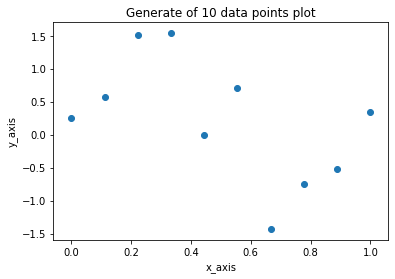

In [19]:
#Final scattering plot of 10 random datasets.
plt.scatter(random_x,Final_value)
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Generate of 10 data points plot')
plt.show()

In [20]:
#random_x value
random_x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [21]:
#random_y value
random_y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [22]:
#noise value
noise

array([ 0.25919818, -0.07747885,  0.53246883,  0.67246351, -0.35230043,
        1.05456271, -0.56668415,  0.23064541,  0.11481004,  0.348095  ])

In [23]:
#tetha value
tetha

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [24]:
#Final_value
Final_value

array([ 0.25919818,  0.56530876,  1.51727658,  1.53848891, -0.01028029,
        0.71254257, -1.43270955, -0.75416234, -0.52797757,  0.348095  ])

### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.


### Gradient descent for poly curve fitting

In [25]:
#Varying polynomial order
M=9
Learning_rate=0.05

In [26]:
theta_values=np.zeros(M+1)
cost_value=[]
h=np.zeros(random_x.size)
for i in range(M+1):
    h += (random_x**i)*theta_values[i]
diff=np.array([np.sum((h-Final_value)*(random_x**j)) for j in range(M+1)])
t_values=theta_values-((Learning_rate*diff)/N)
theta_values=t_values
cost=(np.sum((h-Final_value)**2)/(2*N))
cost_value.append(cost)

epochs=0
tmp=1

while tmp>10**-6:
    h=np.zeros(random_x.size)
    for i in range(M+1):
        h += (random_x**i)*theta_values[i]
    diff=np.array([np.sum((h-Final_value)*(random_x**j)) for j in range(M+1)])
    t_values=theta_values-((Learning_rate*diff)/N)
    theta_values=t_values
    cost=(np.sum((h-Final_value)**2)/(2*N))
    tmp=cost_value[len(cost_value)-1]-cost
    cost_value.append(cost)
    epochs+=1
print(theta_values)

[ 0.58499768  2.71506763 -4.36179933 -3.33017788 -1.19242323  0.40128858
  1.28155921  1.6030502   1.54572299  1.25192374]


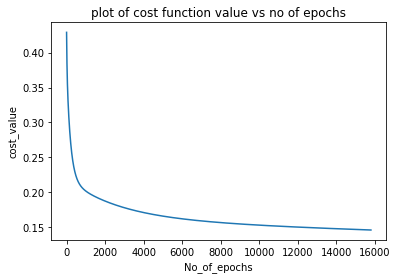

In [27]:
plt.plot(np.arange(epochs+1),np.array(cost_value))
plt.xlabel('No_of_epochs')
plt.ylabel('cost_value')
plt.title('plot of cost function value vs no of epochs')
plt.show()

Plot of  the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points.

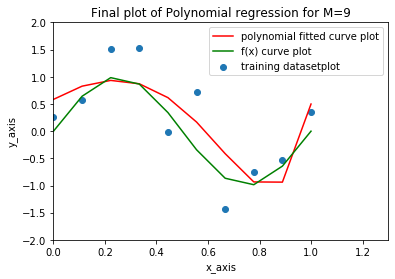

In [28]:
y_hat=np.zeros(random_x.size)
for i in range(M+1):
        y_hat += (random_x**i)*theta_values[i]
plt.scatter(random_x,Final_value,label='training datasetplot')
plt.plot(random_x,y_hat,color='red',label='polynomial fitted curve plot')
plt.plot(random_x,random_y,color='green',label='f(x) curve plot')
plt.ylim((-2,2))
plt.xlim((0,1.3))
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Final plot of Polynomial regression for M={}'.format(M))
plt.legend()
plt.show()

Report of the mean squared error on the training dataset and the coeffcient of theta

In [29]:
#This is the to find out the polynomial function.
def fn(x,theta_values):
    function=0
    w=len(theta_values)
    for k in range(w):
        function += theta_values[k]*(x**k)
    return function

In [30]:
#Mean square error
mse_value={}
mse_test=[]
theta_values_all={}
M_val=[0,1,3,6,9]
for m in M_val:
    theta_values=np.zeros(m+1)
    cost_value=[]
    h=np.zeros(random_x.size)
    for i in range(m+1):
        h += (random_x**i)*theta_values[i]
    diff=np.array([np.sum((h-Final_value)*(random_x**j)) for j in range(m+1)])
    t_values=theta_values-((Learning_rate*diff)/N)
    theta_values=t_values
    cost=(np.sum((h-Final_value)**2)/(2*N))
    cost_value.append(cost)

    epochs=0
    tmp=1

    while tmp>10**-6:
        h=np.zeros(random_x.size)
        for i in range(m+1):
            h += (random_x**i)*theta_values[i]
        diff=np.array([np.sum((h-Final_value)*(random_x**j)) for j in range(m+1)])
        t_values=theta_values-((Learning_rate*diff)/N)
        theta_values=t_values
        cost=(np.sum((h-Final_value)**2)/(2*N))
        tmp=cost_value[len(cost_value)-1]-cost
        cost_value.append(cost)
        epochs+=1
    theta_values_all.update({'M={}'.format(m):theta_values})
    #This code helps in calculating y_value for the found out polynomial function.
    y_axis=[fn(x,theta_values) for x in random_x]
    
    total=0
    for j in range(N):
        total += (Final_value[j]-y_axis[j])**2
    MSE=total/N
    mse_value.update({'{}'.format(m):MSE})
    mse_test.append(MSE)

 The coefficients of  Thetha.

In [31]:
theta_values_all

{'M=0': array([0.21752324]),
 'M=1': array([ 0.91520131, -1.39147537]),
 'M=3': array([  0.64492993,   4.36610171, -16.26807728,  11.22352498]),
 'M=6': array([ 0.5449812 ,  3.63999009, -6.24410453, -4.523786  , -0.72087707,
         2.63401499,  5.10579816]),
 'M=9': array([ 0.58499768,  2.71506763, -4.36179933, -3.33017788, -1.19242323,
         0.40128858,  1.28155921,  1.6030502 ,  1.54572299,  1.25192374])}

mean squared error on the training dataset

In [32]:
Mean_square_error = pd.DataFrame(mse_value,index=['Mean_square_error on training data'])
Mean_square_error=Mean_square_error.transpose()
Mean_square_error['M_value']=['M=0','M=1','M=3','M=6','M=9']
Mean_square_error

,Mean_square_error on training data,M_value
0,0.809420,M=0
1,0.598434,M=1
3,0.338298,M=3
6,0.259034,M=6
9,0.291080,M=9
